In [115]:
import matplotlib
import matplotlib.pyplot as plt
import utils
import numpy as np
import os, time
import shutil
import pandas as pd
import random

import sklearn
import scipy
import collections

reload(utils)
%matplotlib inline

In [116]:
def format_tcga_bc():
    expr_f = '/data/lisatmp4/transcriptome/TCGA/TCGA_brca_expression_1218.txt'
    meta_f = '/data/lisatmp4/transcriptome/TCGA/TCGA_brca_clinical_1218.txt'
    
    expr = pd.read_csv(expr_f, sep="\t", index_col=0).T
    meta = pd.read_csv(meta_f, sep="\t", index_col=0)
    
    return expr, meta.loc[expr.index]

In [117]:
data, labels = format_tcga_bc()

In [118]:
# for name in data.columns:
#     if "BGF" in name:
#         print name

In [29]:
#data.head()

In [30]:
#labels.head()

In [119]:
collections.Counter(labels.PAM50Call_RNAseq)

Counter({nan: 262,
         'Basal': 142,
         'Her2': 67,
         'LumA': 434,
         'LumB': 194,
         'Normal': 119})

In [256]:
pos = labels.PAM50Call_RNAseq == "LumA"

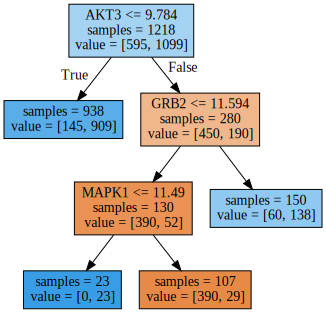

In [92]:
pos = labels.PAM50Call_RNAseq != "Normal"
genes = ["SHC2", "GRB2", "SOS1", "HRAS", "ARAF",    "MAP2K1", "MAPK1", "PIK3CA", "PTEN", "AKT3" , "MTOR"]
subset = data[genes]
import sklearn, sklearn.tree, graphviz
clf = sklearn.tree.DecisionTreeClassifier(min_impurity_decrease=0.02, random_state=10, class_weight={0: 5, 1: 1})
clf = clf.fit(subset, pos) 
dot_data = sklearn.tree.export_graphviz(clf, out_file=None, impurity=False, feature_names=genes, filled=True) 
graph = graphviz.Source(dot_data) 
graph

In [110]:
sklearn.metrics.roc_auc_score(clf.predict(subset), pos)

0.84603413612389278

In [120]:
# pos = labels.PAM50Call_RNAseq == "LumA"
# genes = ["ESR1", "FOS", "CCND1", "PGR"]
# subset = data[genes]
# import sklearn, sklearn.tree, graphviz
# clf = sklearn.tree.DecisionTreeClassifier(random_state=10, min_impurity_decrease=0.01)
# clf = clf.fit(subset, pos) 
# dot_data = sklearn.tree.export_graphviz(clf, out_file=None, impurity=False, feature_names=genes, filled=True) 
# graph = graphviz.Source(dot_data) 
# graph

In [121]:
# pos = labels.PAM50Call_RNAseq == "Basal"
# genes = ["JAG1", "NOTCH1", "ERBB2", "HES1", "HEY1", "FLT4"]
# subset = data[genes]
# import sklearn, sklearn.tree, graphviz
# clf = sklearn.tree.DecisionTreeClassifier(random_state=10, min_impurity_decrease=0.001, class_weight={0: 5, 1: 1})
# clf = clf.fit(subset, pos) 
# dot_data = sklearn.tree.export_graphviz(clf, out_file=None, impurity=True, feature_names=genes, filled=True) 
# graph = graphviz.Source(dot_data) 
# graph

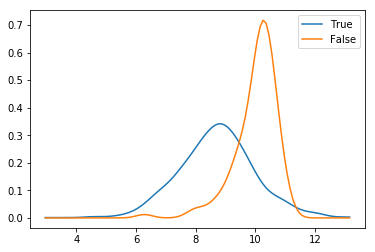

In [111]:
gene = data["AKT3"]
dw = scipy.stats.kde.gaussian_kde(gene[pos])
dwo = scipy.stats.kde.gaussian_kde(gene[~pos])
x = np.arange(gene.min(), gene.max(), .1)
plt.plot(x, dw(x), label="True");
plt.plot(x, dwo(x), label="False");
plt.legend();

282


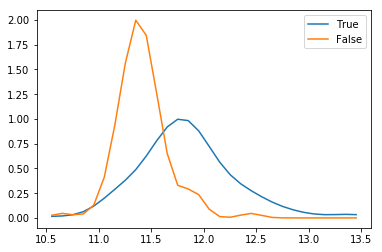

In [107]:
selected = data["AKT3"]>9.78
print selected.sum()
gene = data[selected]["GRB2"]
dw = scipy.stats.kde.gaussian_kde(gene[pos[selected]])
dwo = scipy.stats.kde.gaussian_kde(gene[~pos[selected]])
x = np.arange(gene.min(), gene.max(), .1)
plt.plot(x, dw(x), label="True");
plt.plot(x, dwo(x), label="False");
plt.legend();

112


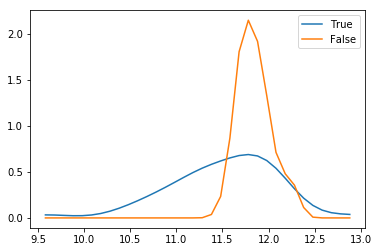

In [108]:
selected = (data["AKT3"]>9.7) & (data["GRB2"]<11.5)
print selected.sum()
gene = data[selected]["MAPK1"]
dw = scipy.stats.kde.gaussian_kde(gene[pos[selected]])
dwo = scipy.stats.kde.gaussian_kde(gene[~pos[selected]])
x = np.arange(gene.min(), gene.max(), .1)
plt.plot(x, dw(x), label="True");
plt.plot(x, dwo(x), label="False");
plt.legend();

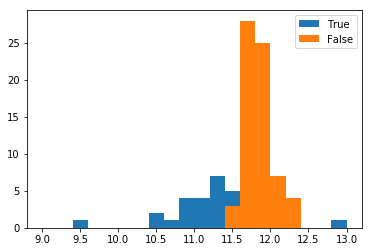

In [109]:
plt.hist(gene[pos[selected]], bins=20,  range=[9,13], label="True");
plt.hist(gene[~pos[selected]], bins=20, range=[9,13], label="False");

plt.legend();

In [ ]:
#just extra plots here

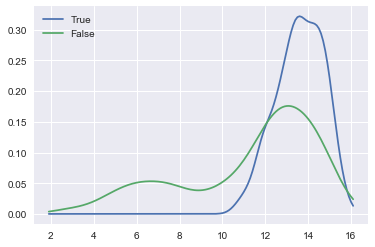

In [344]:
pos = labels.PAM50Call_RNAseq == "LumB"

gene = data["ESR1"]
dw = scipy.stats.kde.gaussian_kde(gene[pos])
dwo = scipy.stats.kde.gaussian_kde(gene[~pos])
x = np.arange(gene.min(), gene.max(), .1)
plt.plot(x, dw(x), label="True");
plt.plot(x, dwo(x), label="False");
plt.legend();

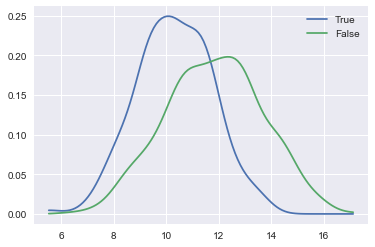

In [356]:
selected = data["ESR1"]>12
gene = data[selected]["FOS"]
dw = scipy.stats.kde.gaussian_kde(gene[pos[selected]])
dwo = scipy.stats.kde.gaussian_kde(gene[~pos[selected]])
x = np.arange(gene.min(), gene.max(), .1)
plt.plot(x, dw(x), label="True");
plt.plot(x, dwo(x), label="False");
plt.legend();

164


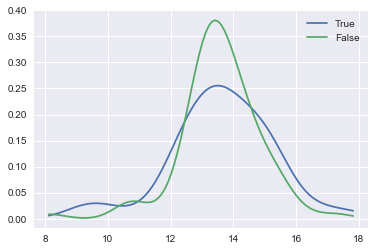

In [359]:
selected = (data["ESR1"]>12) & (data["FOS"]<10)
print selected.sum()
gene = data[selected]["CCND1"]
dw = scipy.stats.kde.gaussian_kde(gene[pos[selected]])
dwo = scipy.stats.kde.gaussian_kde(gene[~pos[selected]])
x = np.arange(gene.min(), gene.max(), .1)
plt.plot(x, dw(x), label="True");
plt.plot(x, dwo(x), label="False");
plt.legend();

151


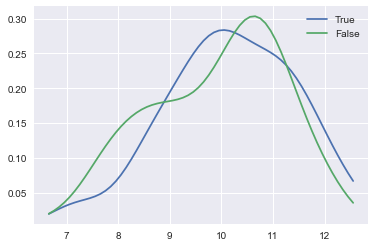

In [360]:
selected = (data["ESR1"]>12) & (data["FOS"]<10) & (data["CCND1"]>12)
print selected.sum()
gene = data[selected]["MYC"]
dw = scipy.stats.kde.gaussian_kde(gene[pos[selected]])
dwo = scipy.stats.kde.gaussian_kde(gene[~pos[selected]])
x = np.arange(gene.min(), gene.max(), .1)
plt.plot(x, dw(x), label="True");
plt.plot(x, dwo(x), label="False");
plt.legend();

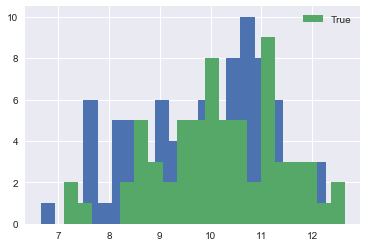

In [361]:
plt.hist(gene[~pos[selected]], bins=20);
plt.hist(gene[pos[selected]], bins=20, label="True");
plt.legend();

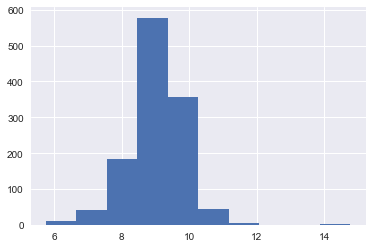

In [183]:
plt.hist(data["PIK3CA"], bins=10);

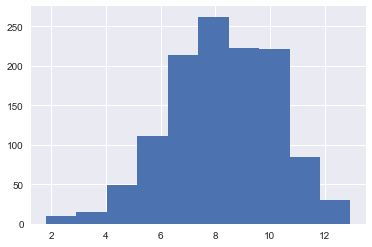

In [78]:
plt.hist(data["IGF1"]);

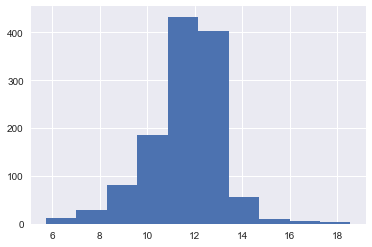

In [81]:
plt.hist(data["IGF1R"]);

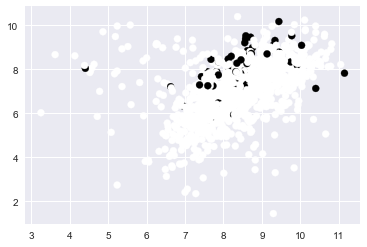

In [88]:
plt.scatter(data["BRCA1"], data["BRCA2"], c=pos)

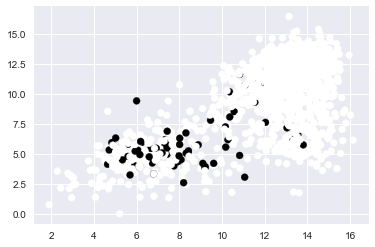

In [242]:
plt.scatter(data["ESR1"], data["PGR"], c=pos)

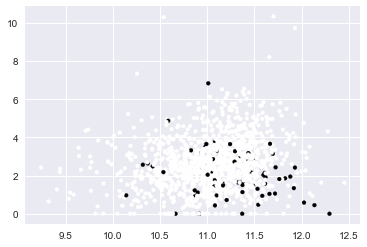

In [338]:
plt.scatter(data["ABL1"], data["NTRK1"], c=pos, s=15);